# Marketing Analysis

### Analyze market viability for elearning case study

## Set Up

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purposes of this analysis, I will utilize Free Code Camp's latest published New Coder's Survey results, as it is a freely available and sizeable dataset containing demographic and interest information that is a suitable proxy audience for our coding elearning product (new coders and people learning to code) without the time or money expenses of running a custom survey for this project.

This survey data is freely made available by FreeCodeCamp via GitHub

## Exploratory Analysis

In [14]:
count=df["JobRoleInterest"].value_counts(normalize=True)*100
count

Full-Stack Web Developer                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                              

Users were allowed to mark more than one interest in the table, so there is a large number of low percentage lists, of multiple interests, or no answer at all. We'll clean up those nulls and split the lists up for easier data management

In [15]:

#Remove Nulls
no_nulls = df['JobRoleInterest'].dropna()
#split lists
split_list = no_nulls.str.split(',')

# Frequency table ofhow many options a user picked
options = split_list.apply(lambda x: len(x)) # x is a list of job options
options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

31% of our surveyed data picked only one option, which suggests the majority(69%), picked more than one option as their interest. The Elearning platform will include many disciplines of coding, so this is fine!

In [16]:
# Frequency table counting users interested in a category containing either "web", or "mobile" development
web_or_mobile = no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


86% of our users are interested in these disciplines! This is promising for the analysis.

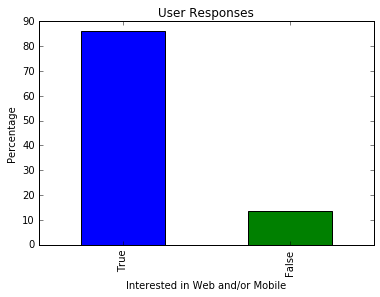

In [17]:
freq_table.plot.bar()
plt.xlabel("Interested in Web and/or Mobile")
plt.ylabel("Percentage")
plt.title("User Responses")

Next, we'll clean out the dataframe of NA's in this column, and look at the locations of the survey responses, to determine promising markets

In [18]:
#dropping NA's from the dataframe
df=df.dropna(subset=["JobRoleInterest"])
countries=df.CountryLive.value_counts(normalize=True)*100
countries[:3]

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Name: CountryLive, dtype: float64

The United States is our largest single market by far, with 45% of our total responses, followed by India, at 7-8%, and the UK, with 4-5%. This suggests it would be a good starting point to market our content in English.

In [31]:
df["MonthsProgramming"].replace(0,1, inplace=True)
df["MonthlySpend"]=df["MoneyForLearning"]/df["MonthsProgramming"]
df[df["MonthsProgramming"]==0].count().sum()


0

Next, we'll determine how much money a given person in our sample spends on learning per month, to see what a reasonable monthly fee might be

In [39]:
countries = df.groupby('CountryLive').mean()
countries['MonthlySpend'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]


CountryLive
United States of America    236.546913
India                       136.874737
United Kingdom               46.878633
Canada                      115.434876
Name: MonthlySpend, dtype: float64

Looking at our data, it looks like the mean user is spending a lot more than our original $50 price point!  But these could be outliers

In [40]:
countries = df.groupby('CountryLive').median()
countries['MonthlySpend'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    5.00
India                       0.00
United Kingdom              0.25
Canada                      0.00
Name: MonthlySpend, dtype: float64

Utilzing the median, which is more robust to outliers (such as users who attended expensive coding bootcamps), we can see that $5 per month is more representative